In [50]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
train = pd.read_csv('new train.csv')
test = pd.read_csv('testing.csv')

In [48]:
temp = np.array(train['sea_pressure'])
for i in range(len(temp)):
    if (math.isnan(float(temp[i]))):
        train = train.drop(i)
train_y = np.array(train.avg_travel_time)
train_x = np.array(train.ix[:,5:])

In [4]:
train_x = preprocessing.scale(train_x)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,test_size=0.1, random_state=random.randrange(0,44))

In [79]:
#mlp = MLPRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(40,30,20),batch_size = 300,max_iter = 100000,random_state=random.randrange(0,44))
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print "MAE: ",metrics.mean_absolute_error(y_test, y_pred)
print "RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE:  191.96311361
RMSE:  263.464362036


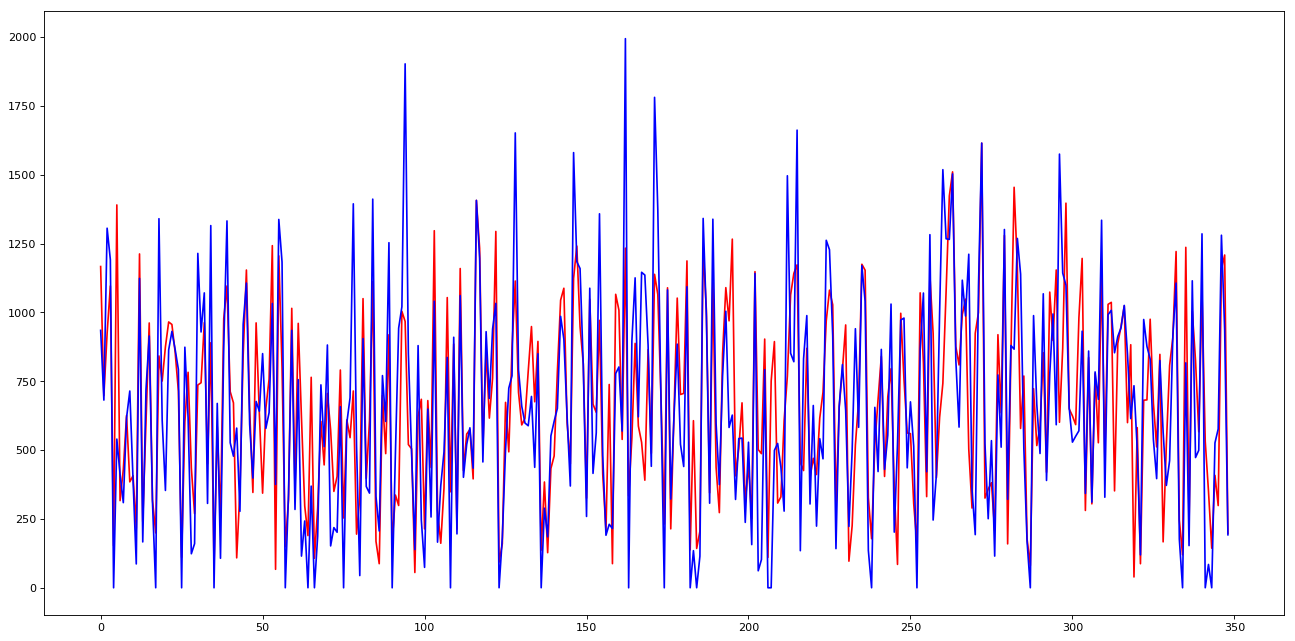

In [85]:
plt.figure(1,figsize=(20, 10), dpi=80)
plt.plot(range(len(y_pred)),y_pred,'r-')
#plt.figure(2,figsize=(20, 10), dpi=80)
plt.plot(range(len(y_pred)),y_test,'b-')

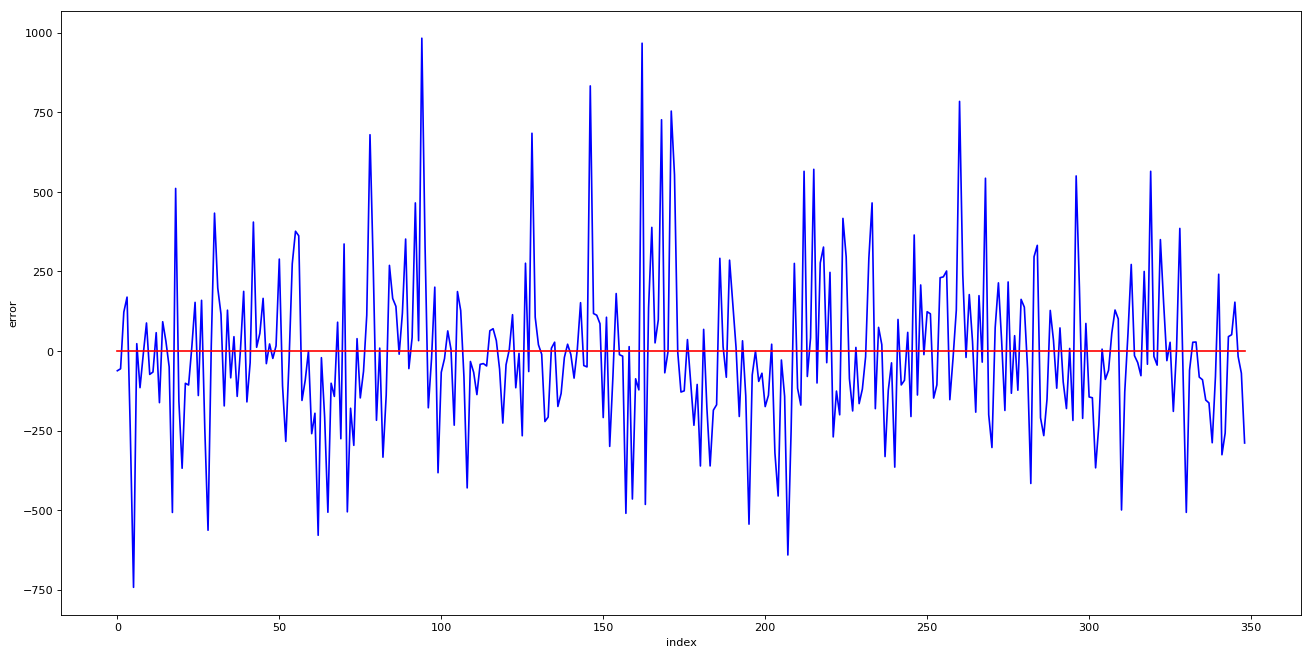

In [118]:
# y_err = y_test - y_pred
y_err = y_test - pre
plt.figure(2,figsize=(20, 10), dpi=80)
plt.plot(range(len(y_pred)),y_err,'b-')
plt.plot(range(len(y_pred)),np.zeros(len(y_pred)),'r-')
plt.xlabel('index')
plt.ylabel('error')
plt.savefig('result.png')

In [61]:
test_x = np.array(test.ix[:,4:])
test_x = preprocessing.scale(test_x)
test_y = mlp.predict(test_x)

In [62]:
for i in range(len(test.time_window_x)):
    test.loc[i,'avg_travel_time'] = round(test_y[i]/9,2)
test.ix[:,0:4].to_csv('ans.csv')

In [9]:
from sklearn.preprocessing import normalize

In [77]:
train_y = np.array(train.avg_travel_time)
train_x = np.concatenate((preprocessing.robust_scale(np.array(train.ix[:,5:13])),np.array(train.ix[:,13:])),axis = 1)

In [84]:
test_x = np.concatenate((preprocessing.robust_scale(np.array(test.ix[:,4:12])),np.array(test.ix[:,12:])),axis = 1)
test_y = mlp.predict(test_x)
for i in range(len(test.time_window_x)):
    test.loc[i,'avg_travel_time'] = round(test_y[i]/9,2)
test.ix[:,0:4].to_csv('ans2.csv')

In [87]:
import xgboost as xgb

In [89]:
xgb_model = xgb.XGBRegressor().fit(train_x,train_y)

In [103]:
predictions = xgb_model.predict(X_test)
# actuals = y[test_index]
print(metrics.mean_absolute_error(y_test, predictions))

180.106393814


In [112]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': range(3,10),
                    'min_child_weight':range(1,8,2)}, verbose=1)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   27.1s finished


0.37686322972
{'max_depth': 5, 'min_child_weight': 1}


In [105]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [116]:
xgb_model = xgb.XGBRegressor(max_depth=5,n_estimators=50,min_child_weight=1,gamma=0.9)
xgb_model.fit(X_train,y_train)
pre = xgb_model.predict(X_test)
print "MAE: ",metrics.mean_absolute_error(y_test, pre)

MAE:  178.251835041


In [115]:
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=1)
clf = GridSearchCV(xgb_model,
                   {'gamma': [i/10.0 for i in range(0,10)]},
                     verbose=1)
clf.fit(train_x,train_y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.7s finished


0.37688753074
{'gamma': 0.9}
